In [10]:
import qiskit as qk
from qiskit.primitives import Sampler
from matplotlib.pyplot import show
from numpy import pi

In [2]:
def run_circuit(circuit_function):
    def wrapper(*args, **kwargs):
        circuit = circuit_function(*args, **kwargs)
        sampler = Sampler()
        job = sampler.run(circuits=[circuit])
        result = job.result()
        return result
    return wrapper

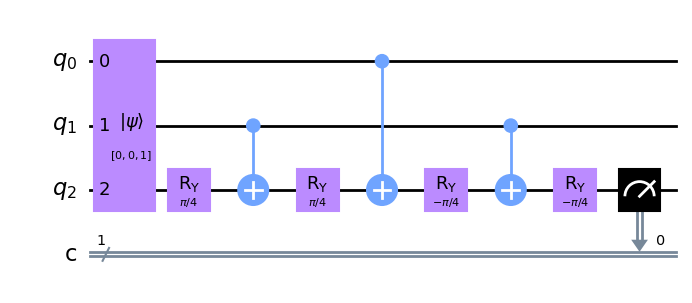

In [38]:
def Margolus(x=0, y=0, z=0):
    circuit = qk.QuantumCircuit(3, 1)
    circuit.initialize(f"{x}{y}{z}")
    circuit.ry(pi/4, 2)
    circuit.cx(1, 2)
    circuit.ry(pi/4, 2)
    circuit.cx(0, 2)
    circuit.ry(-pi/4, 2)
    circuit.cx(1, 2)
    circuit.ry(-pi/4, 2)
    circuit.measure(2, 0)
    return circuit

example = Margolus(z=1)
Margolus = run_circuit(Margolus)
example.draw(output="mpl", style="clifford")

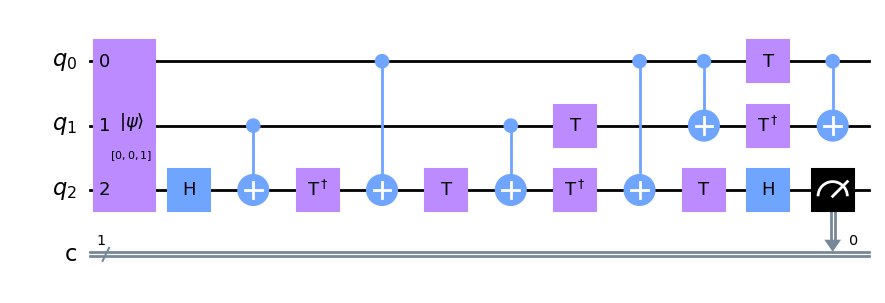

In [35]:
def Toffoli(x=0, y=0, z=0):
    circuit = qk.QuantumCircuit(3, 1)
    circuit.initialize(f"{x}{y}{z}")
    circuit.h(2)
    circuit.cx(1, 2)
    circuit.tdg(2)
    circuit.cx(0, 2)
    circuit.t(2)
    circuit.cx(1, 2)
    circuit.tdg(2)
    circuit.cx(0, 2)
    circuit.t([1, 2])
    circuit.h(2)
    circuit.cx(0, 1)
    circuit.tdg(1)
    circuit.t(0)
    circuit.cx(0, 1)
    circuit.measure(2, 0)
    return circuit

example = Toffoli()
Toffoli = run_circuit(Toffoli)
example.draw(output="mpl", style="clifford")

In [46]:
for x in [0, 1]:
    for y in [0, 1]:
        for z in [0, 1]:
            res_margolus = Margolus(x, y, z).quasi_dists[0].keys()
            res_toffoli = Toffoli(x, y, z).quasi_dists[0].keys()
            print(f"Expected answer for CCX({x},{y},{z}) is", (x & y) ^ z,"\n", 
                  "Margolus:", *res_margolus, "\n", 
                  "Toffoli:", *res_toffoli)

Expected answer for CCX(0,0,0) is 0 
 Margolus: 0 
 Toffoli: 0
Expected answer for CCX(0,0,1) is 1 
 Margolus: 0 
 Toffoli: 0
Expected answer for CCX(0,1,0) is 0 
 Margolus: 0 
 Toffoli: 0
Expected answer for CCX(0,1,1) is 1 
 Margolus: 1 
 Toffoli: 1
Expected answer for CCX(1,0,0) is 0 
 Margolus: 1 
 Toffoli: 1
Expected answer for CCX(1,0,1) is 1 
 Margolus: 1 
 Toffoli: 1
Expected answer for CCX(1,1,0) is 1 
 Margolus: 1 
 Toffoli: 1
Expected answer for CCX(1,1,1) is 0 
 Margolus: 0 
 Toffoli: 0
